In [8]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

import pandas as pd
import numpy as np

# TRAIN_START_DATE = '2010-01-01'
# TRAIN_END_DATE = '2021-10-01'
# TEST_START_DATE = '2021-10-01'
# TEST_END_DATE = '2024-03-01'

# TODO extend this test date
# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'


# TODO Try a longer date range, Some columns have issues over this date range
# Value to be removed
value_to_remove = "DOW"
# Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]
print(DOW_30_TICKER)
PLOT_DATES_TEST_START = '2015-01-03'
PLOT_DATES_TEST_END = '2023-12-29'




df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


# # They replace close price with adjusted close price
# df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
#                      end_date = PLOT_DATES_TEST_END,
#                      ticker_list = [
#     "AMGN",
#     "AAPL",
#     "AMAT",
#     "INTC",
#     "PCAR",
#     "PAYX",
#     "MSFT"]).fetch_data()

print(df.head())


# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for o-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

Shape of DataFrame:  (65598, 8)
         date        open        high         low       close     volume  \
0  2015-01-05   27.072500   27.162500   26.352501   23.687305  257142000   
1  2015-01-05  157.429993  159.600006  154.259995  119.747887    4080300   
2  2015-01-05   92.459999   92.779999   90.320000   78.198059    3469600   
3  2015-01-05  129.660004  129.919998  128.610001  112.870056    5024800   
4  2015-01-05   90.349998   90.419998   86.599998   66.892235   11301400   

    tic  day  
0  AAPL    0  
1  AMGN    0  
2   AXP    0  
3    BA    0  
4   CAT    0  
Number of rows containing null values: 0
Check for o-nulls
True


In [9]:
def calculate_final_investment(X, B, initial_investment, buy_cost=0.001, sell_cost=0.001):
    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."

    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    
    # Calculate transaction costs
    transaction_costs = (B.diff().abs() * buy_cost).sum(axis=1) + (B.diff().abs() * sell_cost).sum(axis=1)
    transaction_costs.iloc[0] = 0  # No transaction cost for the first period
    
    # Adjust the returns by subtracting the transaction costs
    adjusted_weighted_log_returns = weighted_log_returns - transaction_costs
    
    # Calculate cumulative log returns
    cumulative_log_returns = adjusted_weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

In [10]:
# Current and Target Weights
current_weights = pd.Series({'A': 0.5, 'B': 0.3, 'C': 0.2})
target_weights = pd.Series({'A': 0.4, 'B': 0.4, 'C': 0.2})

# Portfolio Value
portfolio_value = 100000

# Current Values
current_values = current_weights * portfolio_value

# Target Values
target_values = target_weights * portfolio_value

# Calculate Buy and Sell Amounts
buy_amounts = target_values[target_values > current_values] - current_values[target_values > current_values]
sell_amounts = current_values[current_values > target_values] - target_values[current_values > target_values]

print("Buy Amounts:\n", buy_amounts)
print("Sell Amounts:\n", sell_amounts)

Buy Amounts:
 B    10000.0
dtype: float64
Sell Amounts:
 A    10000.0
dtype: float64


In [11]:
import pandas as pd


df = pd.DataFrame(df)

print(df.dtypes)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)



# If we pivot and there are nulls, it means some dates dont have all prices
# Count rows with any null values
# Identify columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Identify rows with null values
rows_with_nulls = pivot_df[pivot_df.isnull().any(axis=1)]

print("Columns with null values:", columns_with_nulls)
print("Rows with null values:\n", rows_with_nulls)

print("Check for o-nulls")
print(pivot_df.notnull().all().all())


assert pivot_df.notnull().all().all()


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
tic               AAPL        AMGN         AXP          BA         CAT  \
date                                                                     
2015-01-05   23.687305  119.747887   78.198059  112.870056   66.892235   
2015-01-06   23.689537  115.889999   76.531532  111.540634   66.461845   
2015-01-07   24.021717  119.937408   78.202988  113.272369   67.491776   
2015-01-08   24.944679  119.505386   79.311508  115.275276   68.183510   
2015-01-09   24.971437  118.034935   78.306900  115.047867   67.368782   
...                ...         ...         ...         ...         ...   
2023-12-21  193.944031  273.305603  182.603531  262.019989  286.516785   
2023-12-22  192.868134  278.031433  183.374298  260.440002  286.803223   
2023-12-26  192.320221  277.777069  183.759705  262.790009  292.008698   
2023-12-27  192.419830  280.

In [12]:
import matplotlib.pyplot as plt
# plot normalized prices of these stocks
(pivot_df / pivot_df.iloc[0,:]).plot()

<Axes: xlabel='date'>

In [13]:
from online_algos import OLMAR, BCRP, CRP, BAH, UP


# Simple Moving Average (SMA) vs. Exponential Moving Average (EMA)
# Simple Moving Average (SMA)
# Calculation: Averages the prices over a specified period.

# Sensitivity: Less sensitive to recent price changes because each period has equal weight.

# Lag: More lag compared to EMA, meaning it reacts slower to price changes.

# Use Case: Suitable for identifying longer-term trends.

# Exponential Moving Average (EMA)
# Calculation: Gives more weight to recent prices, making it more responsive.

# Sensitivity: More sensitive to recent price changes due to the weighting factor.

# Lag: Less lag compared to SMA, meaning it reacts faster to price changes.

# Use Case: Better for short-term trading strategies and identifying rapid changes.


algo = OLMAR(window=5, eps=10, ma_type="SMA")

result_olmar = algo.run(pivot_df)
print(result_olmar.summary())
result_olmar.plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:233: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_al

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.48 ± 0.35
    Ulcer index: 0.48
    Information ratio (wrt benchmark): 0.09
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -0.04 ± 0.33
    Beta / Alpha: 1.26 / -1.128%
    Annualized return: 16.34%
    Annualized volatility: 34.26%
    Longest drawdown: 1319 days
    Max drawdown: 81.06%
    Winning days: 52.0%
    Annual turnover: 310.0
        


[<Axes: xlabel='date', ylabel='Total wealth'>,
 <Axes: xlabel='date', ylabel='weights'>]

In [14]:
olmar_B = result_olmar.B
olmar_X = result_olmar.X
print(result_olmar.summary())


result_olmar.fee = 0.001
print(result_olmar.summary())
result_olmar.plot()
olmar_B_fee = result_olmar.B
olmar_X_fee = result_olmar.X


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.48 ± 0.35
    Ulcer index: 0.48
    Information ratio (wrt benchmark): 0.09
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -0.04 ± 0.33
    Beta / Alpha: 1.26 / -1.128%
    Annualized return: 16.34%
    Annualized volatility: 34.26%
    Longest drawdown: 1319 days
    Max drawdown: 81.06%
    Winning days: 52.0%
    Annual turnover: 310.0
        
Summary:
    Profit factor: 0.89
    Sharpe ratio: -0.43 ± 0.35
    Ulcer index: -0.24
    Information ratio (wrt benchmark): -1.08
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -1.23 ± 0.33
    Beta / Alpha: 1.26 / -32.149%
    Annualized return: -14.67%
    Annualized volatility: 34.30%
    Longest drawdown: 1879 days
    Max drawdown: 91.06%
    Winning days: 47.3%
    Annual turnover: 310.0
        


# Cimpare results to makret

Summary:
    Profit factor: 0.96
    Sharpe ratio: -0.07 ± 1.01
    Ulcer index: -0.11
    Information ratio (wrt benchmark): 0.13
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): 0.20 ± 1.01
    Beta / Alpha: 1.28 / 5.069%
    Annualized return: -2.37%
    Annualized volatility: 36.16%
    Longest drawdown: 218 days
    Max drawdown: 37.40%
    Winning days: 49.2%
    Annual turnover: 212.5
        
Summary:
    Profit factor: 0.87
    Sharpe ratio: -0.65 ± 1.11
    Ulcer index: -0.88
    Information ratio (wrt benchmark): -0.68
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): -0.63 ± 1.01
    Beta / Alpha: 1.28 / -16.245%
    Annualized return: -23.62%
    Annualized volatility: 36.30%
    Longest drawdown: 218 days
    Max drawdown: 44.97%
    Winning days: 48.0%
    Annual turnover: 212.5


When factoring in the fees, our portiolo is underperfomring the market in sharpe ratio and returns

In [15]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_olmar = calculate_final_investment(olmar_X, olmar_B, initial_investment, 0, 0)

print("Net Worth Over Time:")
print(net_worth_olmar)

s = pd.Series(net_worth_olmar, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar.index, net_worth_olmar)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()


# with fees
# Calculate final investment amount
# Calculate the net worth over time
net_worth_olmar_fee = calculate_final_investment(olmar_X_fee, olmar_B_fee, initial_investment, 0.001, 0)

print("Net Worth Over Time:")
print(net_worth_olmar_fee)

s = pd.Series(net_worth_olmar_fee, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar_fee.index, net_worth_olmar_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.938691e+05
2015-01-07    1.015124e+06
2015-01-08    1.035555e+06
2015-01-09    1.030777e+06
                  ...     
2023-12-21    2.537639e+06
2023-12-22    2.510062e+06
2023-12-26    2.509597e+06
2023-12-27    2.488920e+06
2023-12-28    2.528183e+06
Length: 2262, dtype: float64
             date        open        high         low       close     volume  \
0      2015-01-05   27.072500   27.162500   26.352501   23.687305  257142000   
1      2015-01-05  157.429993  159.600006  154.259995  119.747887    4080300   
2      2015-01-05   92.459999   92.779999   90.320000   78.198059    3469600   
3      2015-01-05  129.660004  129.919998  128.610001  112.870056    5024800   
4      2015-01-05   90.349998   90.419998   86.599998   66.892235   11301400   
...           ...         ...         ...         ...         ...        ...   
65593  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
65594  2

C:\Users\bencj\AppData\Local\Temp\ipykernel_24580\2732748181.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\bencj\AppData\Local\Temp\ipykernel_24580\2732748181.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# Other stuff
=======================================

In [16]:
algo = BCRP(no_cash=True)
result = algo.run(pivot_df)

bcrp_B = result.B
print(result.B)
bcrp_X = result.X
print(result.X)
print(result.summary())
result.plot();

tic           AAPL  AMGN           AXP   BA           CAT  CRM          CSCO  \
date                                                                           
2015-01-05  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2015-01-06  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2015-01-07  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2015-01-08  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2015-01-09  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
...            ...   ...           ...  ...           ...  ...           ...   
2023-12-21  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2023-12-22  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2023-12-26  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2023-12-27  0.1811   0.0  1.082467e-15  0.0  9.714451e-17  0.0  4.336809e-17   
2023-12-28  0.1811   0.0  1.082467e-15  

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.07 ± 0.42
    Ulcer index: 2.95
    Information ratio (wrt benchmark): 0.83
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): 0.72 ± 0.33
    Beta / Alpha: 1.14 / 12.761%
    Annualized return: 28.56%
    Annualized volatility: 26.71%
    Longest drawdown: 359 days
    Max drawdown: 34.45%
    Winning days: 54.2%
    Annual turnover: 0.7
        


In [17]:
algo = BCRP(no_cash=True)
result_fee = algo.run(pivot_df)


# Here try setting a transaction fee
# Doesnt seem to do anything on BCRP becuase it doesn really change stocks
result_fee.fee = 0.01



bcrp_B_fee = result_fee.B
bcrp_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 1.04 ± 0.41
    Ulcer index: 2.83
    Information ratio (wrt benchmark): 0.79
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): 0.68 ± 0.33
    Beta / Alpha: 1.14 / 12.041%
    Annualized return: 27.84%
    Annualized volatility: 26.71%
    Longest drawdown: 368 days
    Max drawdown: 34.85%
    Winning days: 53.9%
    Annual turnover: 0.7
        


In [18]:


# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp_fee = calculate_final_investment(bcrp_X_fee, bcrp_B_fee, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp_fee)

s = pd.Series(net_worth_bcrp_fee, name='BCRP')

# Convert Series to DataFrame
olmar_bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp_fee.index, net_worth_bcrp_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.879814e+05
2015-01-07    1.000770e+06
2015-01-08    1.031837e+06
2015-01-09    1.024928e+06
                  ...     
2023-12-21    9.103664e+06
2023-12-22    9.115226e+06
2023-12-26    9.112125e+06
2023-12-27    9.101226e+06
2023-12-28    9.129002e+06
Length: 2262, dtype: float64
             date        open        high         low       close     volume  \
0      2015-01-05   27.072500   27.162500   26.352501   23.687305  257142000   
1      2015-01-05  157.429993  159.600006  154.259995  119.747887    4080300   
2      2015-01-05   92.459999   92.779999   90.320000   78.198059    3469600   
3      2015-01-05  129.660004  129.919998  128.610001  112.870056    5024800   
4      2015-01-05   90.349998   90.419998   86.599998   66.892235   11301400   
...           ...         ...         ...         ...         ...        ...   
65593  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
65594  2

C:\Users\bencj\AppData\Local\Temp\ipykernel_24580\2567805052.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [19]:
import pandas as pd
import numpy as np

# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp = calculate_final_investment(bcrp_X, bcrp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp)

s = pd.Series(net_worth_bcrp, name='BCRP')

# Convert Series to DataFrame
bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp.index, net_worth_bcrp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.879814e+05
2015-01-07    1.000770e+06
2015-01-08    1.031837e+06
2015-01-09    1.024928e+06
                  ...     
2023-12-21    9.103664e+06
2023-12-22    9.115226e+06
2023-12-26    9.112125e+06
2023-12-27    9.101226e+06
2023-12-28    9.129002e+06
Length: 2262, dtype: float64
             date        open        high         low       close     volume  \
0      2015-01-05   27.072500   27.162500   26.352501   23.687305  257142000   
1      2015-01-05  157.429993  159.600006  154.259995  119.747887    4080300   
2      2015-01-05   92.459999   92.779999   90.320000   78.198059    3469600   
3      2015-01-05  129.660004  129.919998  128.610001  112.870056    5024800   
4      2015-01-05   90.349998   90.419998   86.599998   66.892235   11301400   
...           ...         ...         ...         ...         ...        ...   
65593  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
65594  2

C:\Users\bencj\AppData\Local\Temp\ipykernel_24580\974869058.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


                ensemble           dji          BCRP
date                                                
2022-01-03  1.000000e+06  1.000000e+06  8.083140e+06
2022-01-04  1.002260e+06  1.005866e+06  7.951049e+06
2022-01-05  9.960529e+05  9.951360e+05  7.662714e+06
2022-01-06  9.907973e+05  9.904718e+05  7.589920e+06
2022-01-07  9.889800e+05  9.903404e+05  7.594446e+06
...                  ...           ...           ...
2023-12-21  8.409294e+05  1.022394e+06  9.103664e+06
2023-12-22  8.442635e+05  1.021892e+06  9.115226e+06
2023-12-26  8.451490e+05  1.026248e+06  9.112125e+06
2023-12-27  8.474781e+05  1.029287e+06  9.101226e+06
2023-12-28  8.500149e+05  1.030751e+06  9.129002e+06

[500 rows x 3 columns]


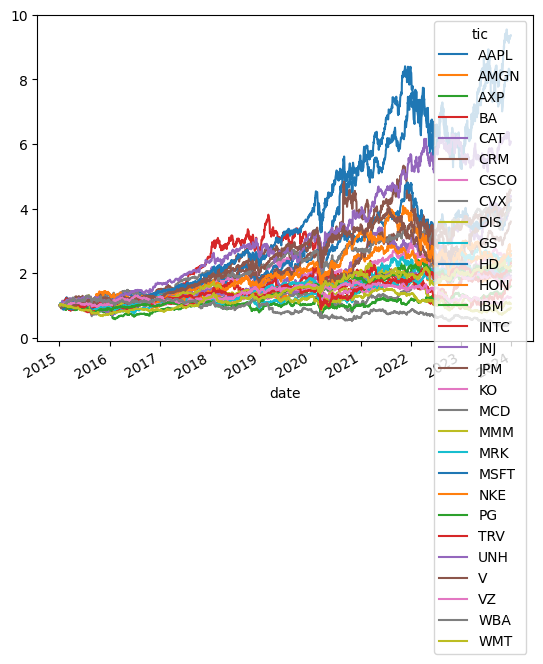

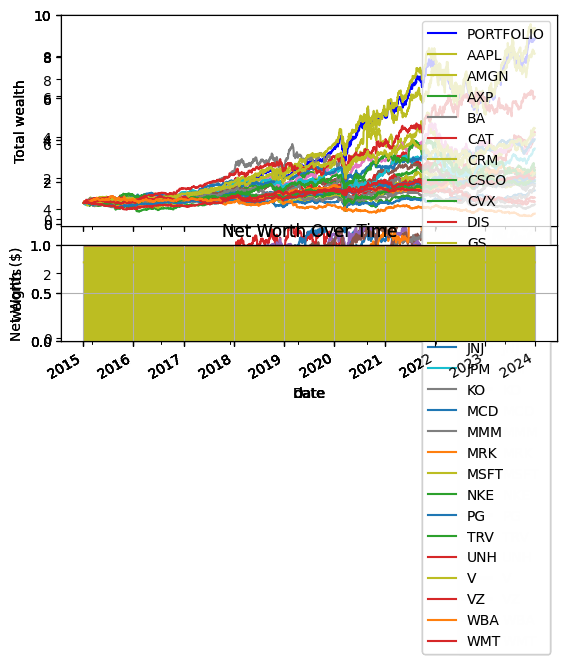

<Figure size 1500x500 with 0 Axes>

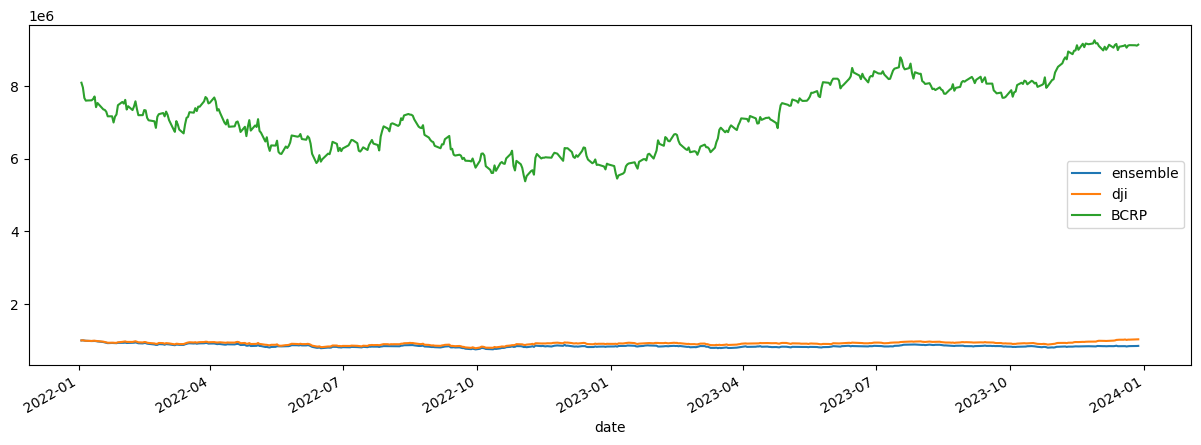

In [20]:
result = pd.DataFrame()
result = pd.read_csv("result20222023.csv")

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

bcrp_df.index = pd.to_datetime(bcrp_df.index)

# Join DataFrames on date index
merged_df = result.join(bcrp_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.78 ± 0.38
    Ulcer index: 2.43
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -0.00 ± 0.35
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 13.88%
    Annualized volatility: 17.71%
    Longest drawdown: 389 days
    Max drawdown: 33.09%
    Winning days: 55.2%
    Annual turnover: 2.1
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.77 ± 0.38
    Ulcer index: 2.37
    Information ratio (wrt benchmark): -33.73
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -1.97 ± 0.33
    Beta / Alpha: 1.00 / -0.210%
    Annualized return: 13.67%
    Annualized volatility: 17.71%
    Longest drawdown: 478 days
    Max drawdown: 33.12%
    Winning days: 55.2%
    Annual turnover: 2.1
        


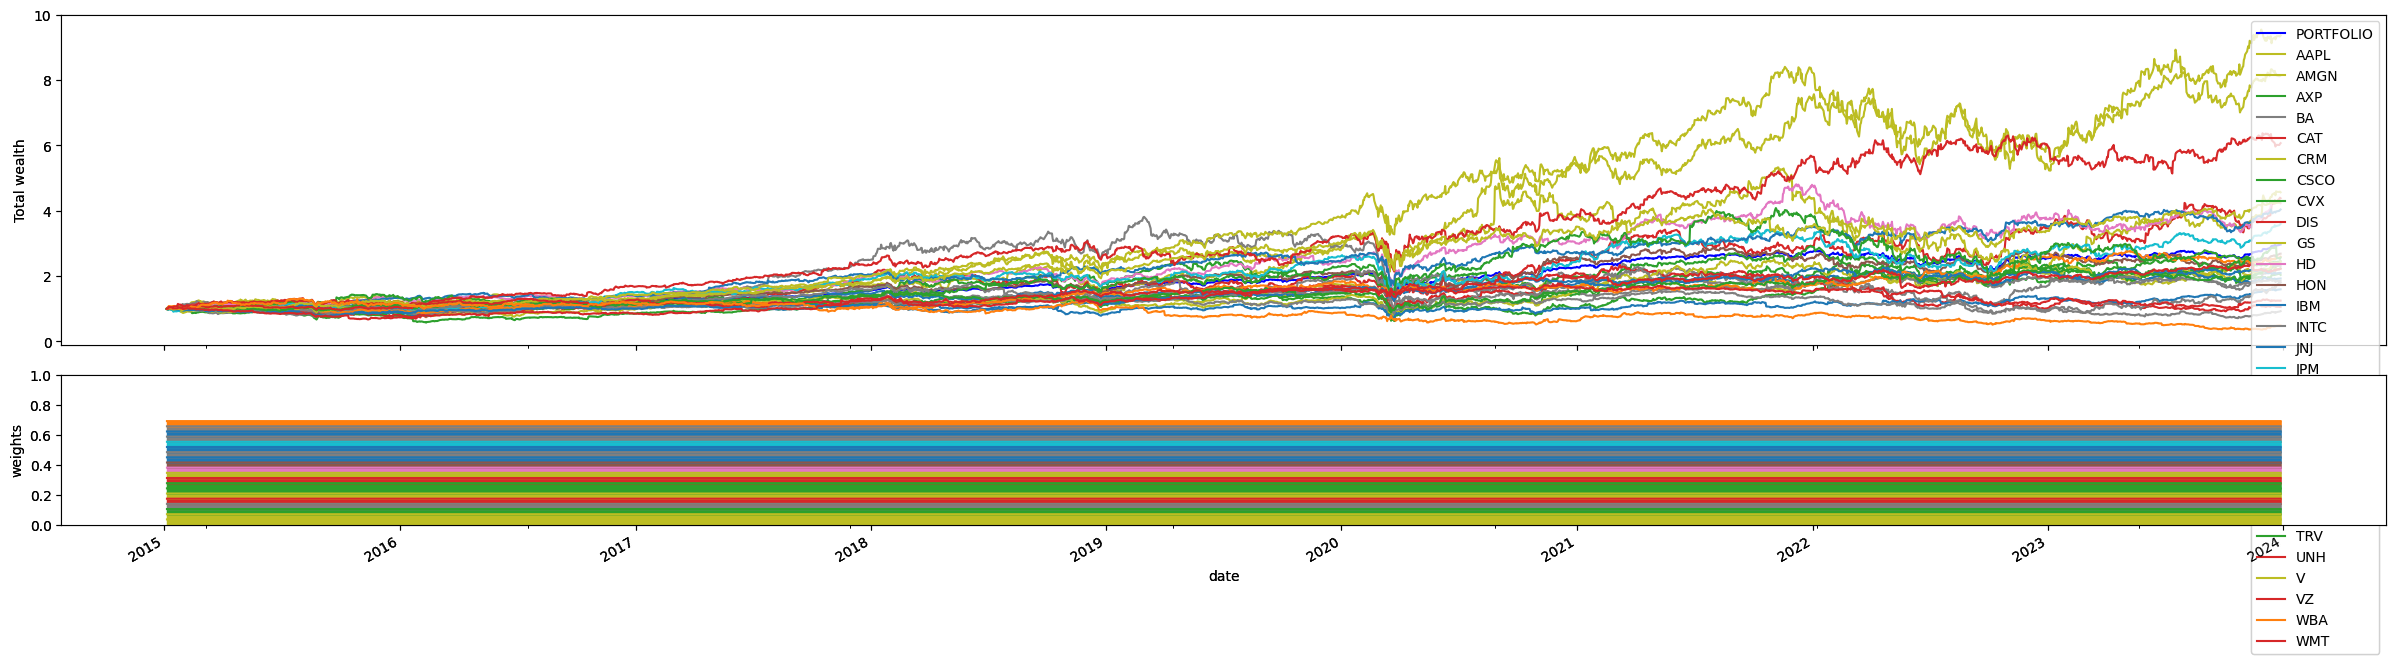

In [21]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())
result.plot();

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.938691e+05
2015-01-07    1.007305e+06
2015-01-08    1.025824e+06
2015-01-09    1.016064e+06
                  ...     
2023-12-21    2.497735e+06
2023-12-22    2.494915e+06
2023-12-26    2.509703e+06
2023-12-27    2.515565e+06
2023-12-28    2.519089e+06
Length: 2262, dtype: float64
             date        open        high         low       close     volume  \
0      2015-01-05   27.072500   27.162500   26.352501   23.687305  257142000   
1      2015-01-05  157.429993  159.600006  154.259995  119.747887    4080300   
2      2015-01-05   92.459999   92.779999   90.320000   78.198059    3469600   
3      2015-01-05  129.660004  129.919998  128.610001  112.870056    5024800   
4      2015-01-05   90.349998   90.419998   86.599998   66.892235   11301400   
...           ...         ...         ...         ...         ...        ...   
65593  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
65594  2

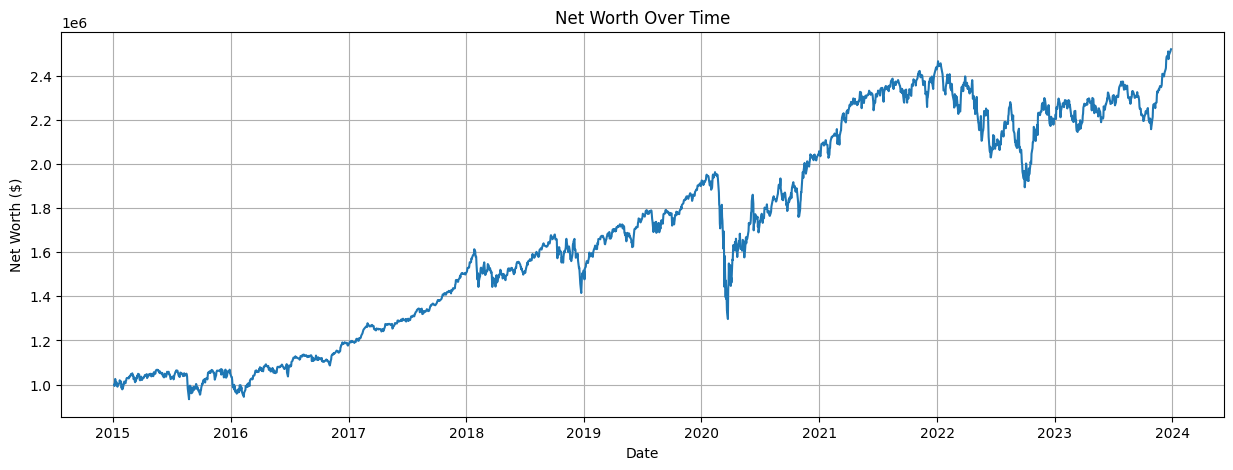

In [22]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_crp = calculate_final_investment(crp_X, crp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_crp)

s = pd.Series(net_worth_crp, name='CRP')

# Convert Series to DataFrame
crp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_crp.index, net_worth_crp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# How do we handle transaction cost here for online

The widely adopted transaction costs model is the proportional transaction costs model in which the incurred transaction cost is proportional
to the wealth transferred during rebalancing.

In [23]:
# algo = TCO1(no_cash=True)
# result = algo.run(list_result)

# tco_B = result.B
# print(result.B)
# tco_X = result.X
# print(result.X)
# print(result.summary())
# result.plot();

In [24]:
# # Initial investment amount
# initial_investment = 1000000

# # Calculate final investment amount
# # Calculate the net worth over time
# net_worth_tco = calculate_final_investment(tco_X, tco_B, initial_investment, 0 ,0)

# print("Net Worth Over Time:")
# print(net_worth_tco)

# s = pd.Series(net_worth_tco, name='OLMAR_tco')

# # Convert Series to DataFrame
# olmar_tco_df = s.to_frame()

# print(df)

# # Plotting the net worth over time
# plt.plot(net_worth_tco.index, net_worth_tco)
# plt.xlabel('Date')
# plt.ylabel('Net Worth ($)')
# plt.title('Net Worth Over Time')
# plt.grid(True)
# plt.show()


# result = pd.DataFrame()
# result = pd.read_csv("result.csv")

# result.set_index('date', inplace=True)

# print(result)
# print(result.dtypes)
# result.index = pd.to_datetime(result.index)

# print(olmar_tco_df)
# print(result.dtypes)
# olmar_tco_df.index = pd.to_datetime(olmar_tco_df.index)

# # Join DataFrames on date index
# merged_df = result.join(olmar_tco_df, how='inner')
# print(merged_df)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.78 ± 0.38
    Ulcer index: 2.43
    Information ratio (wrt benchmark): 0.17
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): 0.06 ± 0.33
    Beta / Alpha: 1.00 / 0.011%
    Annualized return: 13.89%
    Annualized volatility: 17.71%
    Longest drawdown: 389 days
    Max drawdown: 33.12%
    Winning days: 55.0%
    Annual turnover: 2.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.77 ± 0.38
    Ulcer index: 2.36
    Information ratio (wrt benchmark): -1.97
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): -0.98 ± 0.33
    Beta / Alpha: 1.00 / -0.191%
    Annualized return: 13.69%
    Annualized volatility: 17.71%
    Longest drawdown: 478 days
    Max drawdown: 33.16%
    Winning days: 55.0%
    Annual turnover: 2.0
        


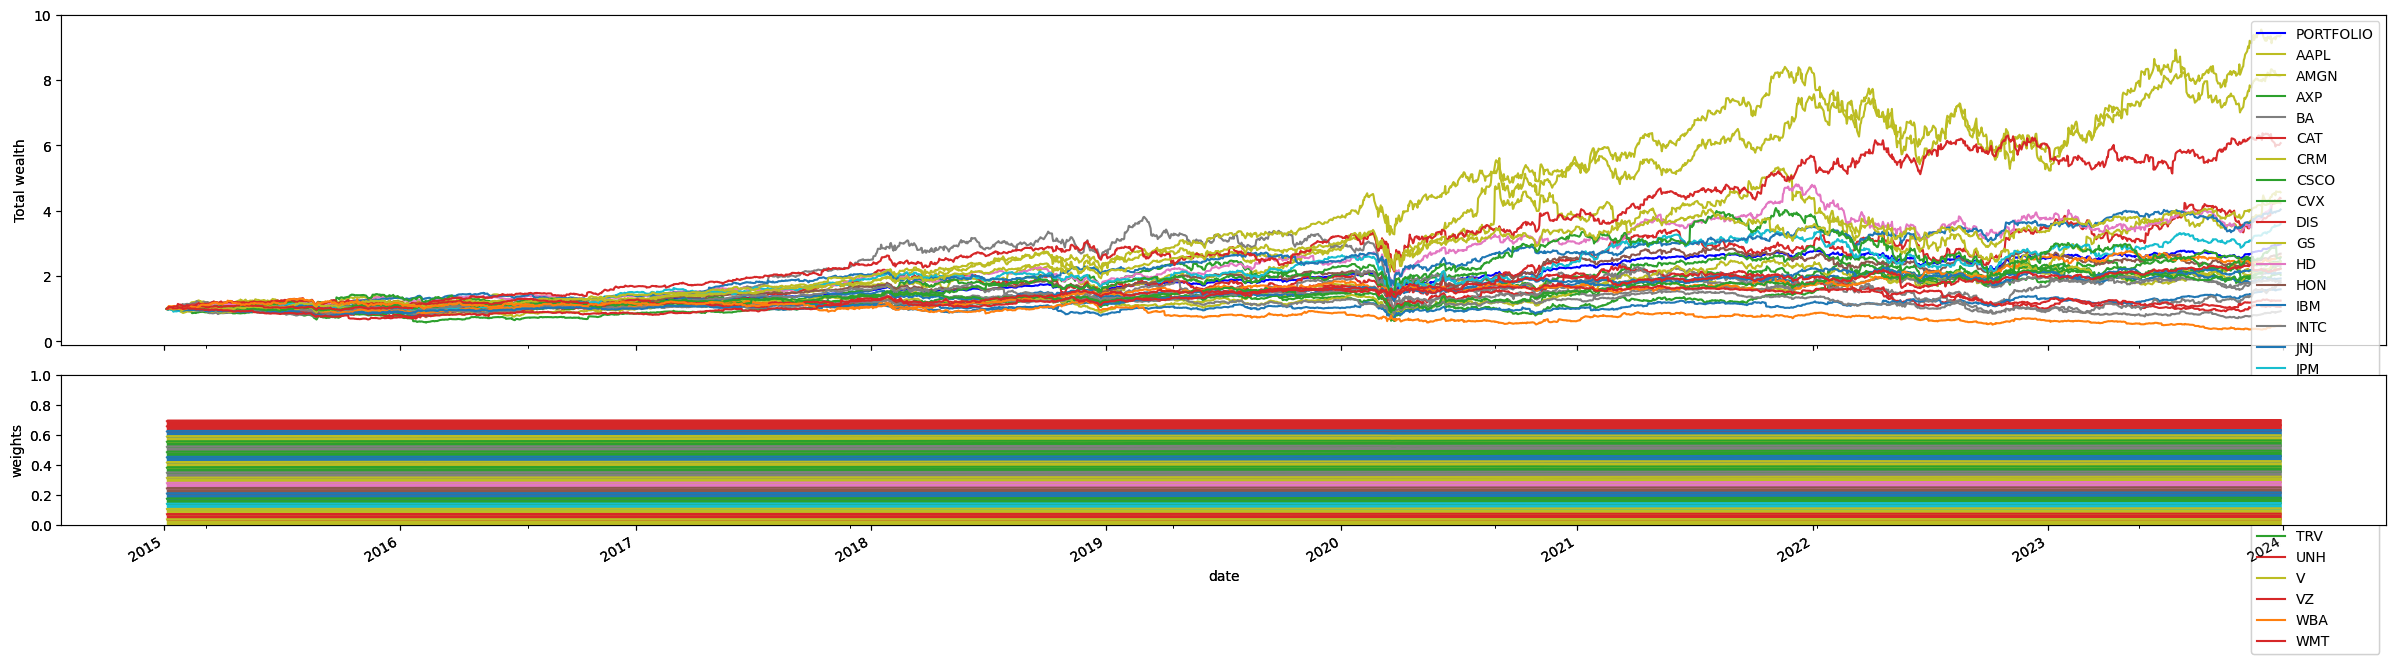

In [25]:
algo = UP()
result = algo.run(pivot_df)

up_B_fee = result.B
up_X_fee = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



up_B_fee = result_fee.B
up_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.938380e+05
2015-01-07    1.007248e+06
2015-01-08    1.025765e+06
2015-01-09    1.016009e+06
                  ...     
2023-12-21    2.498941e+06
2023-12-22    2.495907e+06
2023-12-26    2.510485e+06
2023-12-27    2.516317e+06
2023-12-28    2.519845e+06
Length: 2262, dtype: float64


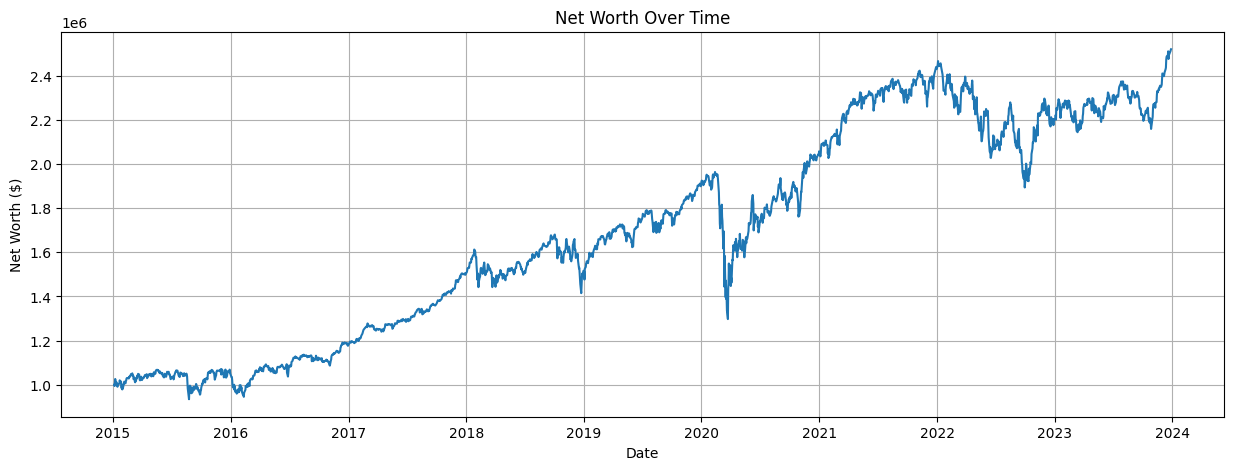

In [26]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_up = calculate_final_investment(up_X_fee, up_B_fee, initial_investment)

print("Net Worth Over Time:")
print(net_worth_up)

s = pd.Series(net_worth_up, name='up')

# Convert Series to DataFrame
up_df = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_up.index, net_worth_up)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                ensemble           dji            up
date                                                
2022-01-03  1.000000e+06  1.000000e+06  2.449572e+06
2022-01-04  1.002260e+06  1.005866e+06  2.466094e+06
2022-01-05  9.960529e+05  9.951360e+05  2.450251e+06
2022-01-06  9.907973e+05  9.904718e+05  2.443212e+06
2022-01-07  9.889800e+05  9.903404e+05  2.451812e+06
...                  ...           ...           ...
2023-12-21  8.409294e+05  1.022394e+06  2.498941e+06
2023-12-22  8.442635e+05  1.021892e+06  2.495907e+06
2023-12-26  8.451490e+05  1.026248e+06  2.510485e+06
2023-12-27  8.474781e+05  1.029287e+06  2.516317e+06
2023-12-28  8.500149e+05  1.030751e+06  2.519845e+06

[500 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

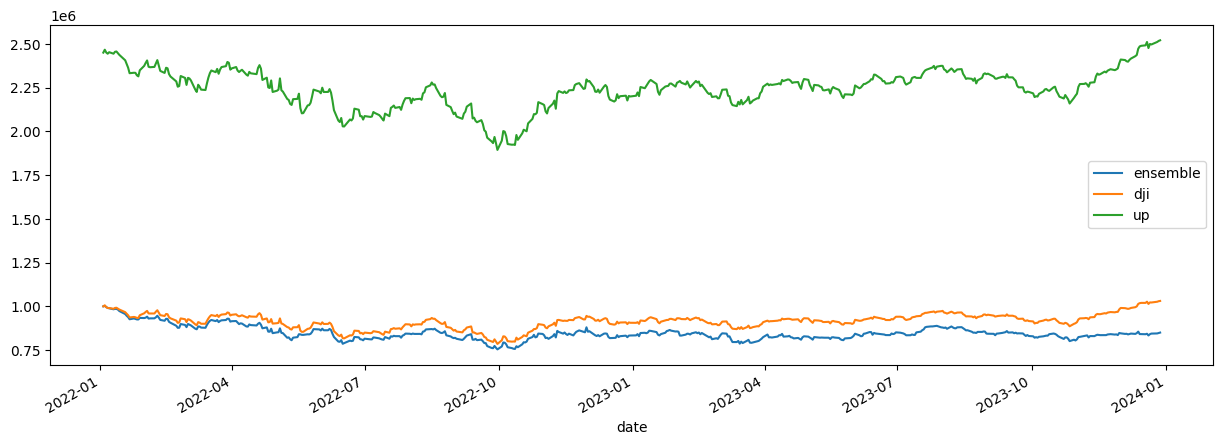

In [27]:
# TODO follow up on this??? How do I factor in the transaction cost here?

result = pd.DataFrame()

# TODO Change result period to use saved file
result = pd.read_csv("result20222023.csv")

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

up_df.index = pd.to_datetime(up_df.index)

# Join DataFrames on date index
merged_df = result.join(up_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (2261, 8)
Annual return          0.089151
Cumulative returns     1.151598
Annual volatility      0.180959
Sharpe ratio           0.563137
Calmar ratio           0.240388
Stability              0.902002
Max drawdown          -0.370862
Omega ratio            1.118696
Sortino ratio          0.781940
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.962421
Daily value at risk   -0.022394
dtype: float64
df_dji:             date           dji
0    2015-01-05  1.000000e+06
1    2015-01-06  9.925716e+05
2    2015-01-07  1.004735e+06
3    2015-01-08  1.023210e+06
4    2015-01-09  1.013468e+06
...         ...           ...
2257 2023-12-21  2.137190e+06
2258 2023-12-22  2.136140e+06
2259 2023-12-26  2.145245e+06
2260 2023-12-27  2.151598e+06
2261 2023-12-28           NaN

[2262 rows x 2 columns]
df_dji:                       dji
date                    
2015-01-05  1.000000e+06
2015-01-06  9.92

<Figure size 1500x500 with 0 Axes>

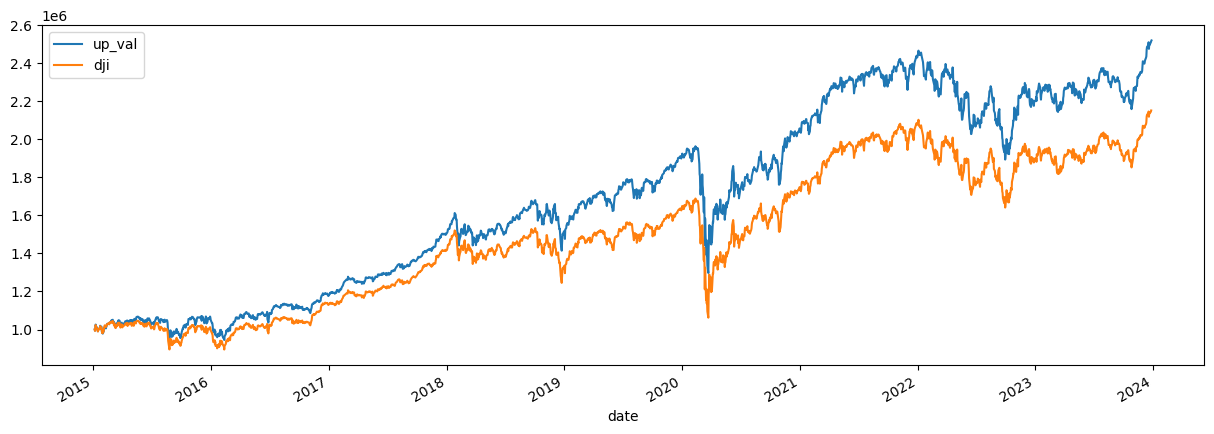

In [28]:
# Try comparing against baseline without ensemble


from finrl.plot import backtest_stats,  get_baseline

first_date = up_df.index.min()
last_date = up_df.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = up_df.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_up = pd.DataFrame({'date': up_df.index, 'up_val': up_df['up']})
df_result_up = df_result_up.set_index('date')

print("df_result_up.columns: ", df_result_up.columns)

print("df_result_up: ", df_result_up)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_up, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();


# BAH basline

=====================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.78 ± 0.38
    Ulcer index: 2.22
    Information ratio (wrt benchmark): 0.03
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): 0.02 ± 0.33
    Beta / Alpha: 1.00 / 0.039%
    Annualized return: 13.97%
    Annualized volatility: 17.94%
    Longest drawdown: 393 days
    Max drawdown: 33.42%
    Winning days: 54.9%
    Annual turnover: 0.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.78 ± 0.38
    Ulcer index: 2.22
    Information ratio (wrt benchmark): 0.03
    Benchmark sharpe: 0.78 ± 0.38
    Appraisal ratio (wrt benchmark): 0.02 ± 0.33
    Beta / Alpha: 1.00 / 0.039%
    Annualized return: 13.97%
    Annualized volatility: 17.94%
    Longest drawdown: 393 days
    Max drawdown: 33.42%
    Winning days: 54.9%
    Annual turnover: 0.0
        


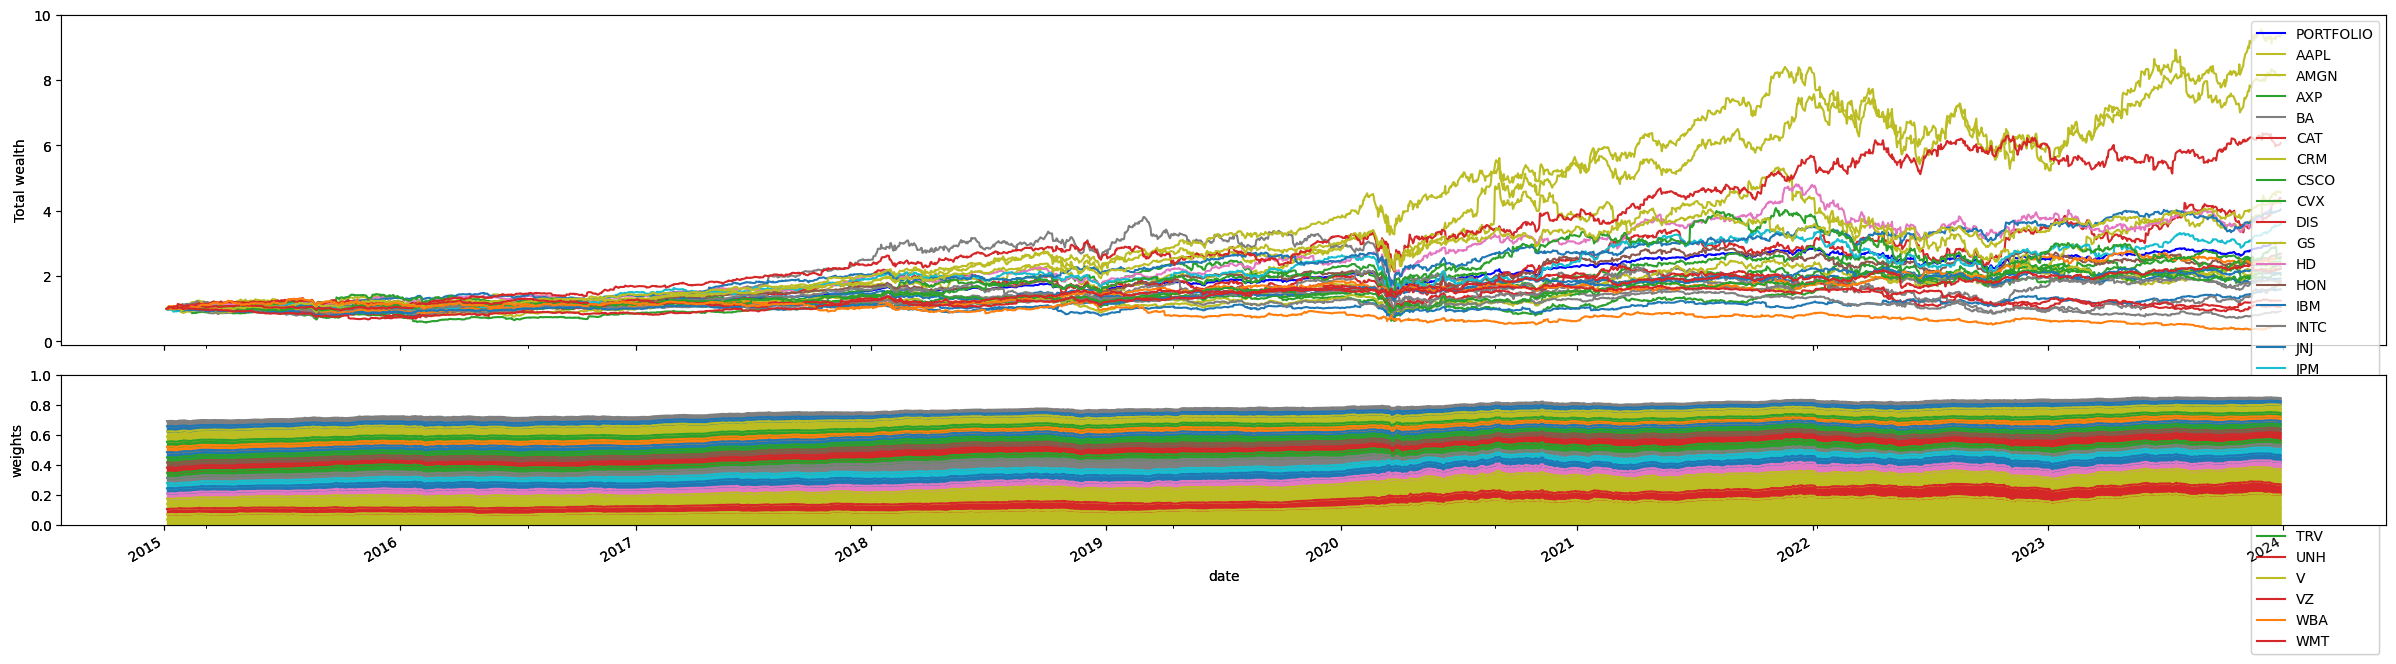

In [29]:
algo = BAH()
result = algo.run(pivot_df)

bah_B = result.B
bah_X = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



bah_B_fee = result_fee.B
bah_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2015-01-05    1.000000e+06
2015-01-06    9.938691e+05
2015-01-07    1.007293e+06
2015-01-08    1.025776e+06
2015-01-09    1.015990e+06
                  ...     
2023-12-21    2.436445e+06
2023-12-22    2.430675e+06
2023-12-26    2.440384e+06
2023-12-27    2.445892e+06
2023-12-28    2.449829e+06
Length: 2262, dtype: float64


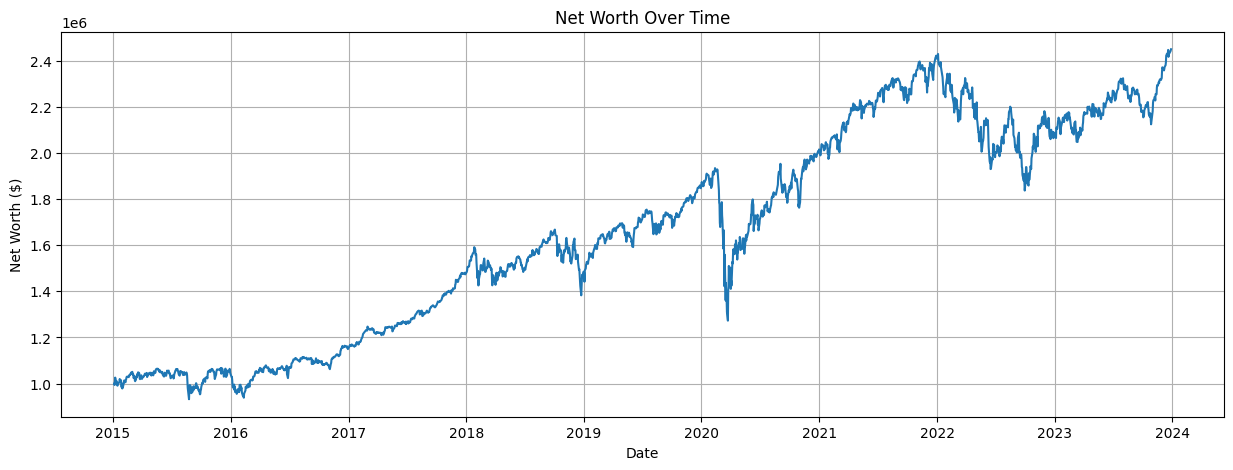

In [30]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bah = calculate_final_investment(bah_X_fee, bah_B_fee, initial_investment, 0.001, 0.001)

print("Net Worth Over Time:")
print(net_worth_bah)

s = pd.Series(net_worth_bah, name='bah')

# Convert Series to DataFrame
bah_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_bah.index, net_worth_bah)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (2261, 8)
Annual return          0.089151
Cumulative returns     1.151598
Annual volatility      0.180959
Sharpe ratio           0.563137
Calmar ratio           0.240388
Stability              0.902002
Max drawdown          -0.370862
Omega ratio            1.118696
Sortino ratio          0.781940
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.962421
Daily value at risk   -0.022394
dtype: float64
df_dji:             date           dji
0    2015-01-05  1.000000e+06
1    2015-01-06  9.925716e+05
2    2015-01-07  1.004735e+06
3    2015-01-08  1.023210e+06
4    2015-01-09  1.013468e+06
...         ...           ...
2257 2023-12-21  2.137190e+06
2258 2023-12-22  2.136140e+06
2259 2023-12-26  2.145245e+06
2260 2023-12-27  2.151598e+06
2261 2023-12-28           NaN

[2262 rows x 2 columns]
df_dji:                       dji
date                    
2015-01-05  1.000000e+06
2015-01-06  9.92

<Figure size 1500x500 with 0 Axes>

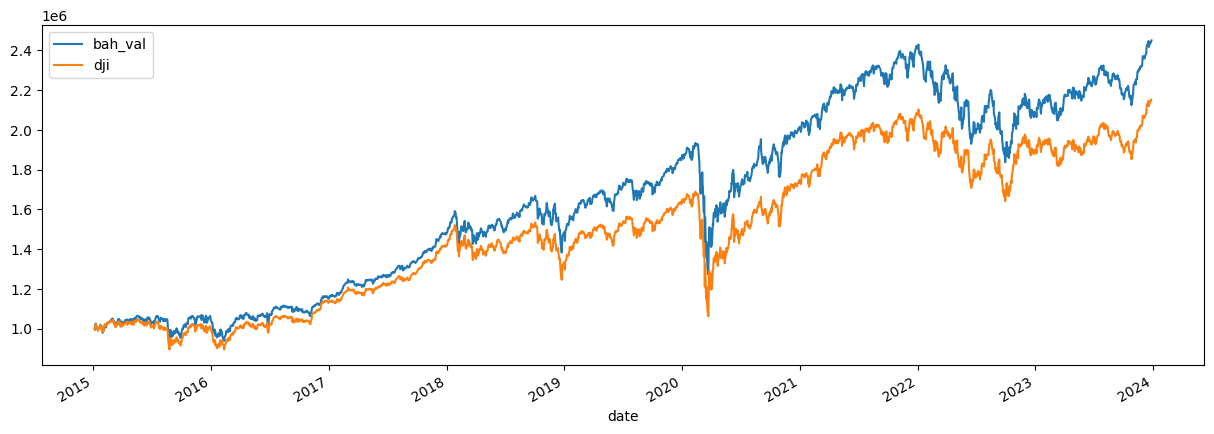

In [31]:
from finrl.plot import backtest_stats,  get_baseline

first_date = bah_df_fee.index.min()
last_date = bah_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = bah_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_bah = pd.DataFrame({'date': bah_df_fee.index, 'bah_val': bah_df_fee['bah']})
df_result_bah = df_result_bah.set_index('date')

print("df_result_bah.columns: ", df_result_bah.columns)

print("df_result_bah: ", df_result_bah)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_bah, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();